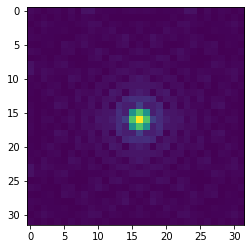

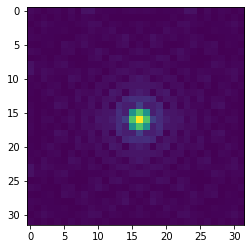

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
um=1e-6
nm=1e-9
mm=1e-3
dx=dy=1*um
wave_length=650*nm
z=1*mm
                              #funcion  DFT
def DFT(U):
    M,N=np.shape(U)
    dft=np.zeros((M,N), dtype="complex")
    
    
    for t in range(0,N):
        for s in range(0,N):
            h2=0
            for n in range(0,N):
                for m in range(0,N):
                    h2=h2+(U[n,m]*np.exp((-1j*2*np.pi/N)*(n*t+m*s)))
            dft[t,s]=h2
    return dft
                            #funcion IDFT

def IDFT(U):
    M,N=np.shape(U)
    dft=np.zeros((M,N), dtype="complex")
    
    
    for t in range(0,N):
        for s in range(0,N):
            h2=0
            for n in range(0,N):
                for m in range(0,N):
                    h2=h2+(U[n,m]*np.exp((1j*2*np.pi/N)*(n*t+m*s)))
            dft[t,s]=h2
            
           
    return dft



mask=np.zeros((32,32),dtype="uint8")
cv2.circle(mask,(16,16),8,1,-1)
#z2=000000.1*mm #distancia
A_prop=DFT(mask)
dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift((DFT(mask)))))
plt.show()



plt.figure()
plt.imshow(np.abs(np.fft.fftshift((IDFT(mask)))))
plt.show()




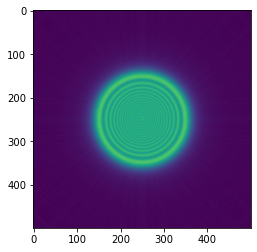

In [21]:
                         #funcion de transformada de fresnel FFT
%matplotlib inline
def A_px(U_f,dx_f,dy_f,z_f,wave_length):
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    #definir el espacio coordenado
    N_f,M_f=np.shape(U_f)
    x=np.arange(-int(M_f/2),int(M_f/2),1)
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    x0,y0 =np.meshgrid(x,y)
    
    #dimensionando en el espacio de frecuencias
    dx0=(wave_length*z_f)/(M_f*dx_f)
    dy0=(wave_length*z_f)/(N_f*dy_f)
    
    fx=x0*(1/(M_f*dx0))
    fy=y0*(1/(N_f*dy0))
    
    

    
    k=2*np.pi/wave_length
    
    #U'
    C1=(1j*(k/(2*z_f)))
    U_1=U_f*np.exp(C1*(((X*dx_f)**2)+((Y*dy_f)**2)))
    U_2=np.fft.fft2(U_1) 
   
    
    #U''
    C2=((np.exp(1j*k*z_f))/(1j*wave_length*z_f))
    C3=(1j*(k/(2*z_f)))
         
    U_F=C2*U_2*np.exp(C3*(((fx)**2)+((fy)**2)))
    
   
    return U_F



#transmitancia que se va a utilizar para propagar

mask=np.zeros((500,500),dtype="uint8")
cv2.circle(mask,(250,250),150,1,-1)
#z2=1000*mm #distancia
A_prop=A_px(mask,dx,dy,z2,wave_length)
dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift((A_px(mask,1*um,1*um,1*mm,650*nm)))))
plt.show()



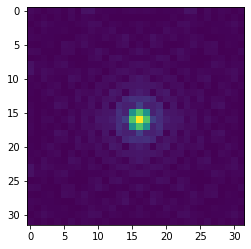

In [47]:
                               #funcion transfornada de fresnel DFT 
%matplotlib inline
def A_px(U_f,dx_f,dy_f,z_f,wave_length):
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    #definir el espacio coordenado
    N_f,M_f=np.shape(U_f)
    x=np.arange(-int(M_f/2),int(M_f/2),1)
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    x0,y0 =np.meshgrid(x,y)
    
    #dimensionando en el espacio de frecuencias
    dx0=(wave_length*z_f)/(M_f*dx_f)
    dy0=(wave_length*z_f)/(N_f*dy_f)
    
    fx=x0*(1/(M_f*dx0))
    fy=y0*(1/(N_f*dy0))
    
    

    
    k=2*np.pi/wave_length
    
    #U'
    C1=(1j*(k/(2*z_f)))
    U_1=U_f*np.exp(C1*(((X*dx_f)**2)+((Y*dy_f)**2)))
    
    U_2=DFT(U_1)
    
    #U''
    C2=((np.exp(1j*k*z_f))/(1j*wave_length*z_f))
    C3=(1j*(k/(2*z_f)))
         
    U_F=C2*U_2*np.exp(C3*(((fx)**2)+((fy)**2)))
    
   
    return U_F



#transmitancia que se va a utilizar para propagar

mask=np.zeros((32,32),dtype="uint8")
cv2.circle(mask,(16,16),8,1,-1)
#z2=1000*mm #distancia
A_prop=A_px(mask,dx,dy,z2,wave_length)
dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(np.abs(np.fft.fftshift((A_px(mask,1*um,1*um,1*mm,650*nm)))))
plt.show()

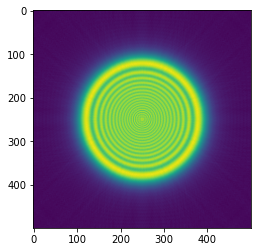

In [27]:
                                   #espectro angular por FFT
def A_px(U_f,dx_f,dy_f,z_f,wave_length):
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    #definir el espacio coordenado
    N_f,M_f=np.shape(U_f)
    x=np.arange(-int(M_f/2),int(M_f/2),1)
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    
    #dimensionando en el espacio de frecuencias
    fX=X*(1/(M_f*dx_f))
    fY=Y*(1/(N_f*dy_f))
    
    
    k=2*np.pi/wave_length
    C1=1j*z_f*k
    
    matriz=np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))
    
    #frecuencias propagadas que se retornan
    freq_p=U_freq*matriz
    return np.fft.ifft2(freq_p)


#transmitancia que se va a utilizar para propagar

mask=np.zeros((500,500),dtype="uint8")
cv2.circle(mask,(250,250),150,1,-1)
z2=2*mm #distancia
A_prop=A_px(mask,dx,dy,z2,wave_length)
dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(np.abs((A_px(mask,1*um,1*um,1*mm,650*nm))))
plt.show()


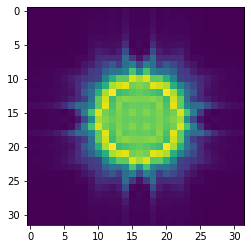

In [42]:
                                       #espectro angular por DFT
def A_px(U_f,dx_f,dy_f,z_f,wave_length):
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    #definir el espacio coordenado
    N_f,M_f=np.shape(U_f)
    x=np.arange(-int(M_f/2),int(M_f/2),1)
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    
    #dimensionando en el espacio de frecuencias
    fX=X*(1/(M_f*dx_f))
    fY=Y*(1/(N_f*dy_f))
    
    
    k=2*np.pi/wave_length
    C1=1j*z_f*k
    
    matriz=np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))
    
    #frecuencias propagadas que se retornan
    freq_p=U_freq*matriz
    return IDFT(freq_p)


#transmitancia que se va a utilizar para propagar

mask=np.zeros((32,32),dtype="uint8")
cv2.circle(mask,(16,16),8,1,-1)

A_prop=A_px(mask,dx,dy,z2,wave_length)
dodoco_prop=np.fft.ifft2(A_prop)

plt.figure()
plt.imshow(np.abs((A_px(mask,1*um,1*um,0.01*mm,650*nm))))
plt.show()

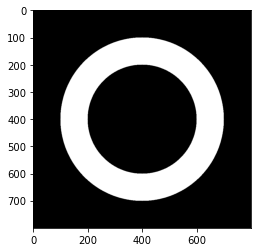

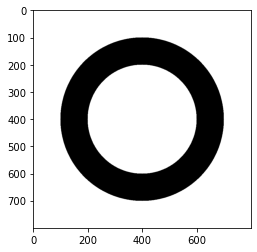

In [28]:
                                                #babinet
#deninir el campo de entrada
%matplotlib inline
r=200
mask=np.zeros((800,800), dtype="uint8")
cv2.circle(mask,(400,400),300,1,-1)
cv2.circle(mask,(400,400),r,0,-1)
plt.imshow(mask, cmap="gray")
plt.show()

mask2=np.ones((800,800), dtype="uint8")
cv2.circle(mask2,(400,400),300,0,-1)
cv2.circle(mask2,(400,400),r,1,-1)
plt.imshow(mask2, cmap="gray")
plt.show()

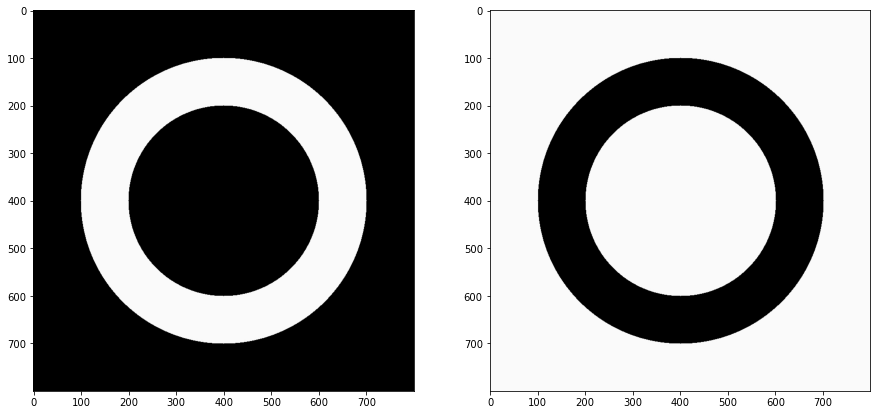

In [29]:
def A_px(U_f,dx_f,dy_f,z_f,wave_length):
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia
    U_freq=np.fft.fftshift(np.fft.fft2(U_f))
    #definir el espacio coordenado
    N_f,M_f=np.shape(U_f)
    x=np.arange(-int(M_f/2),int(M_f/2),1)
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    
    #dimensionando en el espacio de frecuencias
    fX=X*(1/(M_f*dx_f))
    fY=Y*(1/(N_f*dy_f))
    
    
    k=2*np.pi/wave_length
    C1=1j*z_f*k
    
    matriz=np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))
    
    #frecuencias propagadas que se retornan
    freq_p=U_freq*matriz
    return np.fft.ifft2(freq_p)



T=A_px(mask,1*mm,1*um,1*um,650*nm)
Tr=A_px(mask2,1*mm,1*um,1*um,650*nm)
fig, ax=plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.abs((T))**2,cmap="gray")
ax[1].imshow(np.abs((Tr))**2,cmap="gray")
plt.show()

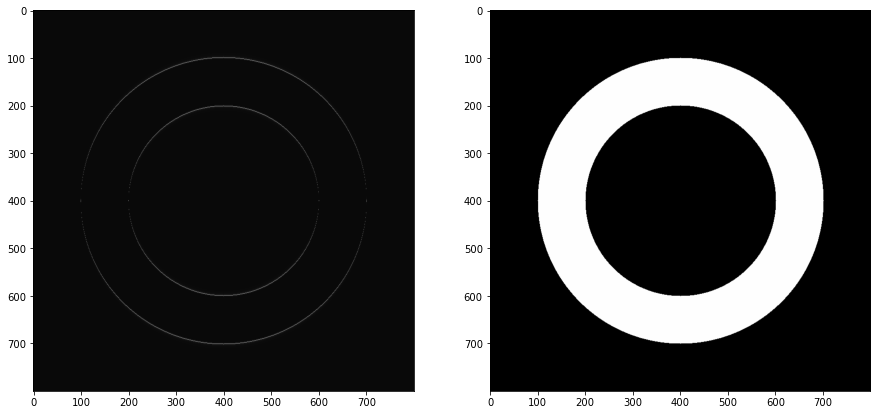

In [30]:
fig, ax=plt.subplots(1,2,figsize=(15,15))
ax[0].imshow(np.abs((T))+np.abs((Tr))**2,cmap="gray")
ax[1].imshow(np.abs((T))-np.abs((Tr))**2,cmap="gray")
plt.show()

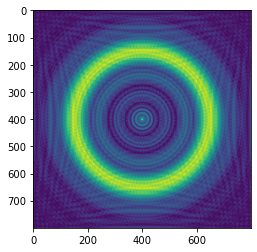

<Figure size 432x288 with 0 Axes>

In [49]:
                                           #punto de arago
    
#propagando con espectroangular el punto de arago 
def A_px(U_f,dx_f,dy_f,z_f,wave_length): 
    #contenido frecuencial de la imagen, transformada de fourier de una transmitancia 
    U_freq=np.fft.fftshift(np.fft.fft2(U_f)) 
    #definir el espacio coordenado 
    N_f,M_f=np.shape(U_f) 
    x=np.arange(-int(M_f/2),int(M_f/2),1) 
    y=np.arange(-int(N_f/2),int(N_f/2),1)
    X,Y=np.meshgrid(x,y)
    #dimensionando en el espacio de frecuencias
    fX=X*(1/(M_f*dx_f))
    fY=Y*(1/(N_f*dy_f))
    
    k=2*np.pi/wave_length
    C1=1j*z_f*k
    
    matriz=np.exp(C1*np.sqrt(1-(wave_length**2)*((fX**2)+(fY**2))))
    #frecuencias propagadas que se retornan
    freq_p=U_freq*matriz
    return np.fft.ifft2(freq_p)
r=200 
mask=np.zeros((800,800), dtype ="uint8") 
cv2.circle(mask,(400,400),300,1,-1) 
cv2.circle(mask,(400,400),r,0,-1)

A_prop=A_px(mask,dx,dy,z2,wave_length) 
dodoco_prop=np.fft.ifft2(A_prop)
plt.imshow(np.abs(A_px(mask,1*um,1*um,10000*um,650*nm)))
plt.figure() 
plt.show()